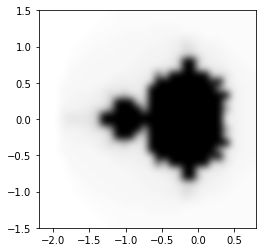

In [18]:
import numpy
from matplotlib import pyplot as plot
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

N = 32
max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = numpy.empty((N, N))

for i, y in enumerate(Y):
	for j, x in enumerate(X):
		Z[i, j] = iter_count(complex(x, y), max_iter)
                                #선택적인 파라미터인 extent는 2D배열에 저장한 데이터에 대한 좌표계를 지정한다.
plot.imshow(Z, cmap = cm.binary, extent = (xmin, xmax, ymin, ymax), interpolation = 'bicubic')
plot.show()


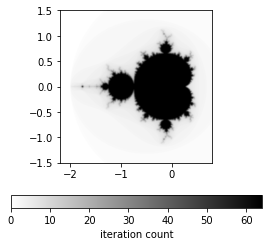

In [23]:
import numpy
from matplotlib import pyplot as plot
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

N = 512
max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = numpy.empty((N, N))

for i, y in enumerate(Y):
	for j, x in enumerate(X):
		Z[i, j] = iter_count(complex(x, y), max_iter)

plot.imshow(Z,
            cmap = cm.binary,
            interpolation = 'bicubic',
            extent=(xmin, xmax, ymin, ymax))

cb = plot.colorbar(orientation='horizontal', shrink=.75)
cb.set_label('iteration count')

plot.show()

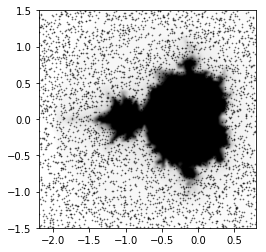

In [28]:
import numpy
from numpy.random import uniform, seed

from matplotlib import pyplot as plot
from matplotlib.mlab import griddata
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5

sample_count = 2 ** 12
A = uniform(xmin, xmax, sample_count)
B = uniform(ymin, ymax, sample_count)
C = [iter_count(complex(a, b), max_iter) for a, b in zip(A, B)]

N = 512
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = griddata(A, B, C, X, Y, interp = 'linear')

plot.scatter(A, B, color = (0., 0., 0., .5), s = .5)
plot.imshow(Z,
            cmap = cm.binary,
            interpolation = 'bicubic',
            extent=(xmin, xmax, ymin, ymax))
plot.show()

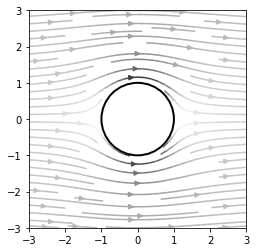

In [1]:
import numpy, sympy
from sympy.abc import x, y
from matplotlib import pyplot as plot
import matplotlib.patches as patches
import matplotlib.cm as cm

def cylinder_stream_function(U = 1, R = 1):
	r = sympy.sqrt(x ** 2 + y ** 2)
	theta = sympy.atan2(y, x)
	return U * (r - R ** 2 / r) * sympy.sin(theta)

def velocity_field(psi):
	u = sympy.lambdify((x, y), psi.diff(y), 'numpy')
	v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
	return u, v

psi = cylinder_stream_function()
U_func, V_func = velocity_field(psi)

xmin, xmax, ymin, ymax = -3, 3, -3, 3
Y, X = numpy.ogrid[ymin:ymax:128j, xmin:xmax:128j]
U, V = U_func(X, Y), V_func(X, Y)

M = (X ** 2 + Y ** 2) < 1.
U = numpy.ma.masked_array(U, mask = M)
V = numpy.ma.masked_array(V, mask = M)

shape = patches.Circle((0, 0), radius = 1., lw = 2., fc = 'w', ec = 'k', zorder = 0)
plot.gca().add_patch(shape)

plot.streamplot(X, Y, U, V, color = U ** 2 + V ** 2, cmap = cm.binary)

plot.axes().set_aspect('equal')
plot.show()


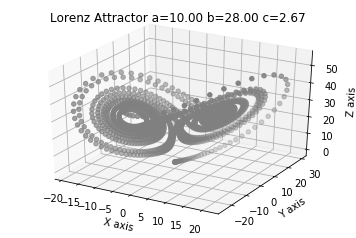

In [9]:
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plot

# Dataset generation
a, b, c = 10., 28., 8. / 3.
def lorenz_map(X, dt = 1e-2):
	X_dt = numpy.array([a * (X[1] - X[0]),
	                    X[0] * (b - X[2]) - X[1],
	                    X[0] * X[1] - c * X[2]])
	return X + dt * X_dt

points = numpy.zeros((2000, 3))
X = numpy.array([.1, .0, .0])
for i in range(points.shape[0]):
    points[i], X = X, lorenz_map(X)
    
# Plotting
fig = plot.figure()
ax = fig.gca(projection = '3d')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Lorenz Attractor a=%0.2f b=%0.2f c=%0.2f' % (a, b, c))

'''
ax.scatter(points[:, 0], points[:, 1],  points[:, 2],
           marker = 's',
           edgecolor = '.5',
           facecolor = '.5')
'''
ax.scatter(points[:, 0], points[:, 1],  points[:, 2],
           zdir = 'z',
           c = '.5')
plot.show()

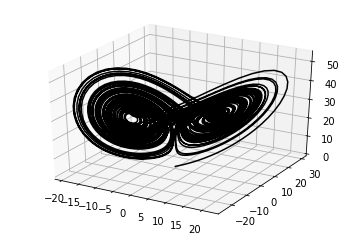

In [2]:
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plot

a, b, c = 10., 28., 8. / 3.
def lorenz_map(X, dt = 1e-2):
	X_dt = numpy.array([a * (X[1] - X[0]),
	                    X[0] * (b - X[2]) - X[1],
	                    X[0] * X[1] - c * X[2]])
	return X + dt * X_dt

points = numpy.zeros((10000, 3))
X = numpy.array([.1, .0, .0])
for i in range(points.shape[0]):
	points[i], X = X, lorenz_map(X)



fig = plot.figure()
ax = fig.gca(projection = '3d')

ax.plot(points[:, 0], points[:, 1],  points[:, 2], c = 'k')
plot.show()


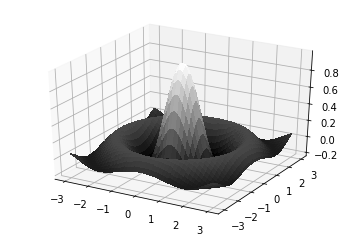

In [3]:
import numpy
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plot


x = numpy.linspace(-3, 3, 256)
y = numpy.linspace(-3, 3, 256)
X, Y = numpy.meshgrid(x, y)
Z = numpy.sinc(numpy.sqrt(X ** 2 + Y ** 2))

fig = plot.figure()
ax = fig.gca(projection = '3d')
#ax.plot_surface(X, Y, Z, color = 'w')
#ax.plot_surface(X, Y, Z, cmap=cm.gray)
ax.plot_surface(X, Y, Z, cmap=cm.gray, linewidth=0, antialiased=False)

plot.show()
